In [30]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("adbudget_sales.csv")
df.tail()

,index,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [32]:
df.isna().sum()

index                      0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [33]:
df = df.iloc[:, 1:]

df = df.rename(
    columns={
        "TV Ad Budget ($)": "TV",
        "Radio Ad Budget ($)": "Radio",
        "Newspaper Ad Budget ($)": "Newspaper",
        "Sales ($)": "Sales"
    }
)

df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [34]:
corr_TV = df["Sales"].corr(df["TV"])
corr_TV

np.float64(0.7822244248616066)

In [35]:
corr_newspp = df["Sales"].corr(df["Newspaper"])
corr_newspp

np.float64(0.22829902637616534)

In [36]:
corr_radio = df["Sales"].corr(df["Radio"])
corr_radio

np.float64(0.5762225745710552)

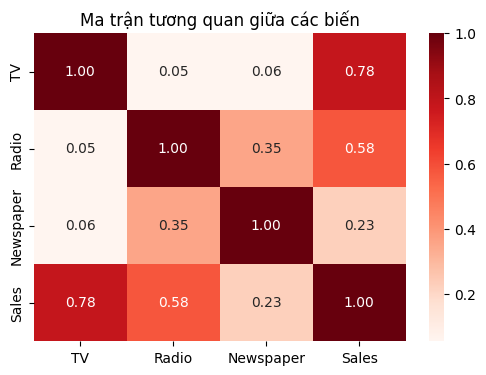

In [38]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds, fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show()

In [ ]:
#tao mo hinh Radio
model = LinearRegression()
X = df[["Radio"]]
y = df["Sales"]
model.fit(X, y)

model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# tao duong hoi quy
y_pred = model.predict(X)
y_pred

array([16.96597871, 17.26972238, 18.60619455, 17.67471395, 11.49859256,
       19.2136819 , 15.95349979, 13.28055545,  9.73687924,  9.83812713,
       10.48611364, 14.1715369 , 16.41924009, 10.85060605, 15.97374937,
       18.97068696, 16.72298377, 17.33047112, 13.46280165, 14.15128732,
       14.9207713 , 10.34436659, 12.53132105, 12.73381683, 11.86308497,
       10.02037334, 15.24476455, 12.69331768, 14.79927383, 12.55157063,
       15.04226877, 12.83506473,  9.61538177, 13.36155376,  9.59513219,
       10.14187081, 18.18095341, 19.31492979, 14.71827551, 16.94572913,
       13.82729406, 16.07499726, 14.9207713 , 11.01260268, 14.51577973,
       13.86779322, 11.31634635, 17.71521311, 12.51107147, 11.68083876,
        9.93937502, 11.25559762, 17.75571226, 18.66694329, 15.14351666,
       19.31492979, 15.00176961, 13.19955714, 19.35542895, 15.28526371,
        9.71662966, 17.95820805, 12.45032274, 15.30551328, 17.97845762,
       11.19484888, 14.29303437, 12.24782695, 14.88027214, 18.20

In [42]:
# --- In thông tin mô hình ---
print("Hệ số hồi quy (slope):", model.coef_[0])
print("Hệ số chặn (intercept):", model.intercept_)
print(f"Phương trình: Sales = {model.intercept_:.2f} + {model.coef_[0]:.2f} * Radio")

Hệ số hồi quy (slope): 0.20249578339243965
Hệ số chặn (intercept): 9.311638095158283
Phương trình: Sales = 9.31 + 0.20 * Radio


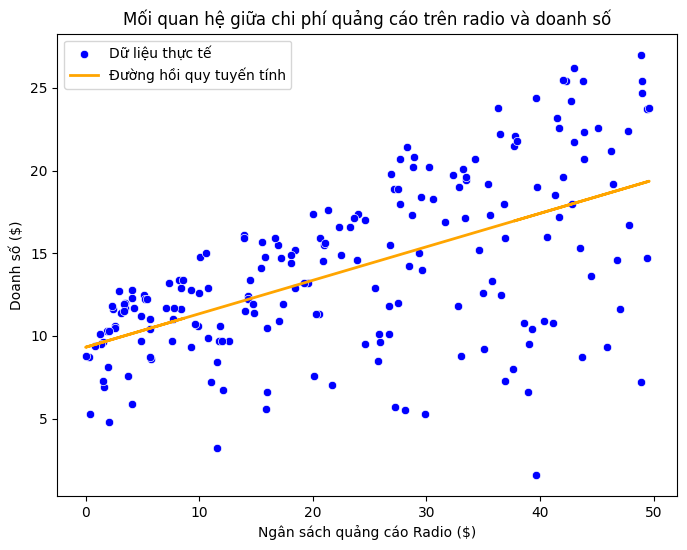

In [41]:
#ve bieu do hoi quy
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X["Radio"], y=y, color="blue", label="Dữ liệu thực tế")
plt.plot(X["Radio"], y_pred, color="orange", linewidth = 2, label="Đường hồi quy tuyến tính")
plt.title("Mối quan hệ giữa chi phí quảng cáo trên radio và doanh số")
plt.xlabel("Ngân sách quảng cáo Radio ($)")
plt.ylabel("Doanh số ($)")
plt.legend()
plt.show()